In [1]:
import numpy as np
import random
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
X_image = [[0,255,0],[255,0,255],[0,255,0]]
I_image = [[255,0,255],[255,0,255],[255,0,255]]

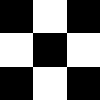

In [3]:
im = Image.fromarray(np.array(X_image).astype('uint8'))
im.resize((100,100),0)

In [4]:
#normalize images
X_image = [[0,1,0],[1,0,1],[0,1,0]]
I_image = [[1,0,1],[1,0,1],[1,0,1]]

In [5]:
import random
import numpy as np

number_of_examples = 32
# Our first input consists of our batch size and the 2 dimensional images (3x3).
input_images = np.ones((number_of_examples,3,3))
# Our second input consists of our batch size and the 1 dimensional numerical data.
input_number = np.zeros((number_of_examples,1))
# The output consists of our batch size and 1 dimensional numerical data.
output_array = np.zeros((number_of_examples,1))

for i in range(number_of_examples):
	#Randomly get our number
	random_number = random.randint(0,1)
	#Randomly select our image
	random_image = random.randint(0,1)
	
	if(random_image == 0):
		image = X_image
	else:
		image = I_image

	#Getting our output
	if(random_number == 0):
		if(random_image == 0):
			output = 1
		else:
			output = 0
	else:
		if(random_image == 0):
			output = 0
		else:
			output = 1

	input_images[i] = image
	input_number[i] = random_number
	output_array[i] = output

#We reshape our images to the format: (batch, rows, columns, channels)
input_images = input_images.reshape(number_of_examples,3,3,1)

In [6]:
print(input_images.shape)
print(input_number.shape)
print(output_array.shape)

(32, 3, 3, 1)
(32, 1)
(32, 1)


In [7]:
#Importing from the keras.Model class
class model(keras.Model):
  def __init__(self):
    super().__init__()
    
    #The layers to process our image
    self.Conv2D_1 = tf.keras.layers.Conv2D(filters = 32,
                                           kernel_size = (1,1),
                                          strides = (1,1)
                                          )
    
    self.Conv2D_2 = tf.keras.layers.Conv2D(filters = 32,
                                           kernel_size = (3,3),
                                          strides = (1,1)
                                          )    

    #The layers to process our number
    self.Number_dense_1 = tf.keras.layers.Dense(units=32, activation="relu")
    self.Number_dense_2 = tf.keras.layers.Dense(units=16, activation="relu")

    #our combined layers
    self.Combined_dense_1 = tf.keras.layers.Dense(units=32, activation="relu")
    self.Combined_dense_2 = tf.keras.layers.Dense(units=2, activation="softmax")


  def call(self, input_image,input_number):
    
    #Image model
    I = self.Conv2D_1(input_image)
    I = self.Conv2D_2(I)
    #Flatten I so we can merge our data.
    I = tf.keras.layers.Flatten()(I)

    #Number model
    N = self.Number_dense_1(input_number)
    N = self.Number_dense_2(N)

    #Combined model
    x = tf.concat([N,I],1) #Concatenate through axis #1
    x = self.Combined_dense_1(x)
    x = self.Combined_dense_2(x)
    return x


In [8]:
network = model()

In [9]:
optimizer = tf.keras.optimizers.Adam()
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
def train_step(model, optimizer,loss_function,
            images_batch,numbers_batch,
            labels):
  
  with tf.GradientTape() as tape:
    model_output = model(images_batch,numbers_batch)
    loss = loss_function(labels,model_output) #our labels vs our predictions

  grads = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))

  return loss


In [11]:
def train(model, optimizer,loss_function,epochs,
            images_batch,numbers_batch,
            labels):
  loss_array = []
  for epoch in range(epochs):
    loss = train_step(model, optimizer,loss_function,images_batch,numbers_batch,labels)
    loss_array.append(loss)
      

    if ((epoch+1)%20 == 0):
      #Calculating accuracy
      network_output = network(images_batch,numbers_batch)
      preds = np.argmax(network_output, axis = 1)
      acc = 0
      for i in range(len(images_batch)):
        if(preds[i]== labels[i]):
          acc += 1
      
      print (" loss:", loss, "  Accuracy: ", acc/len(images_batch)*100,"%")

      fig = plt.figure(figsize = (10,4))
      plt.plot(loss_array)
      plt.show()
      clear_output(wait = True)

 loss: tf.Tensor(0.31494844, shape=(), dtype=float32)   Accuracy:  100.0 %


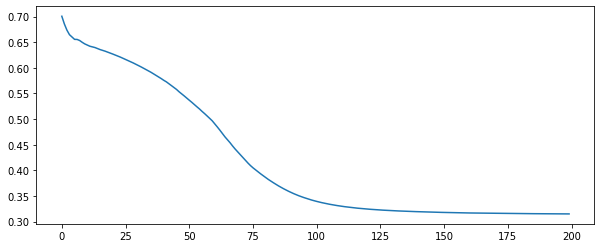

In [12]:
train(network,optimizer,loss_function,200,input_images,input_number,output_array)